In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1.2 Numerische Lösung der Advektionsgleichung

In [2]:
def upwind_verfahren(Uo, Nx, dx, CFL=1):    
      
    dt = CFL*dx                     # Zeitschrittweite
    c_positiv = 1*(dt/dx)
    c_negativ = 0
    t_ende = 5                      # Endzeit
    Nt = int(t_ende/dt)             # Anzahl der Zeitschritte
    
    # Initialisierung der Zustandsmatrix
    U = np.zeros((Nt+1, Nx))
    U[0] = Uo
    
    #Lösung des beschriebenen Problems
    for n in range(Nt):
        for i in range(1, Nx-1):
            U[n+1, i] = U[n, i] - c_positiv*(U[n, i] - U[n, i-1]) + c_negativ*(U[n, i+1] - U[n, i])
            
    return U,dt

In [12]:
# Parameter der Aufgabestellung
Nx = 100                         # Anzahlpunkte für das Gitter
xmin = 0                          # Anfangspunkt
xmax = 10                         # Endpunkt
dx = (xmax - xmin)/Nx             # Schrittweite
x = np.linspace(xmin, xmax, Nx)
CFL = 0.9

# Glatte Anfangsbedingung
Uo_glatt = np.exp(-2.5*(x-2)**2)
U_glatt, dt1 = upwind_verfahren(Uo_glatt, Nx, dx, CFL)

# Unstetige Anfangsbedingung
Uo_unstetig = np.where(np.logical_and(x>=1, x<=3), 1, 0)
U_unstetig, dt2 = upwind_verfahren(Uo_unstetig, Nx, dx, CFL)

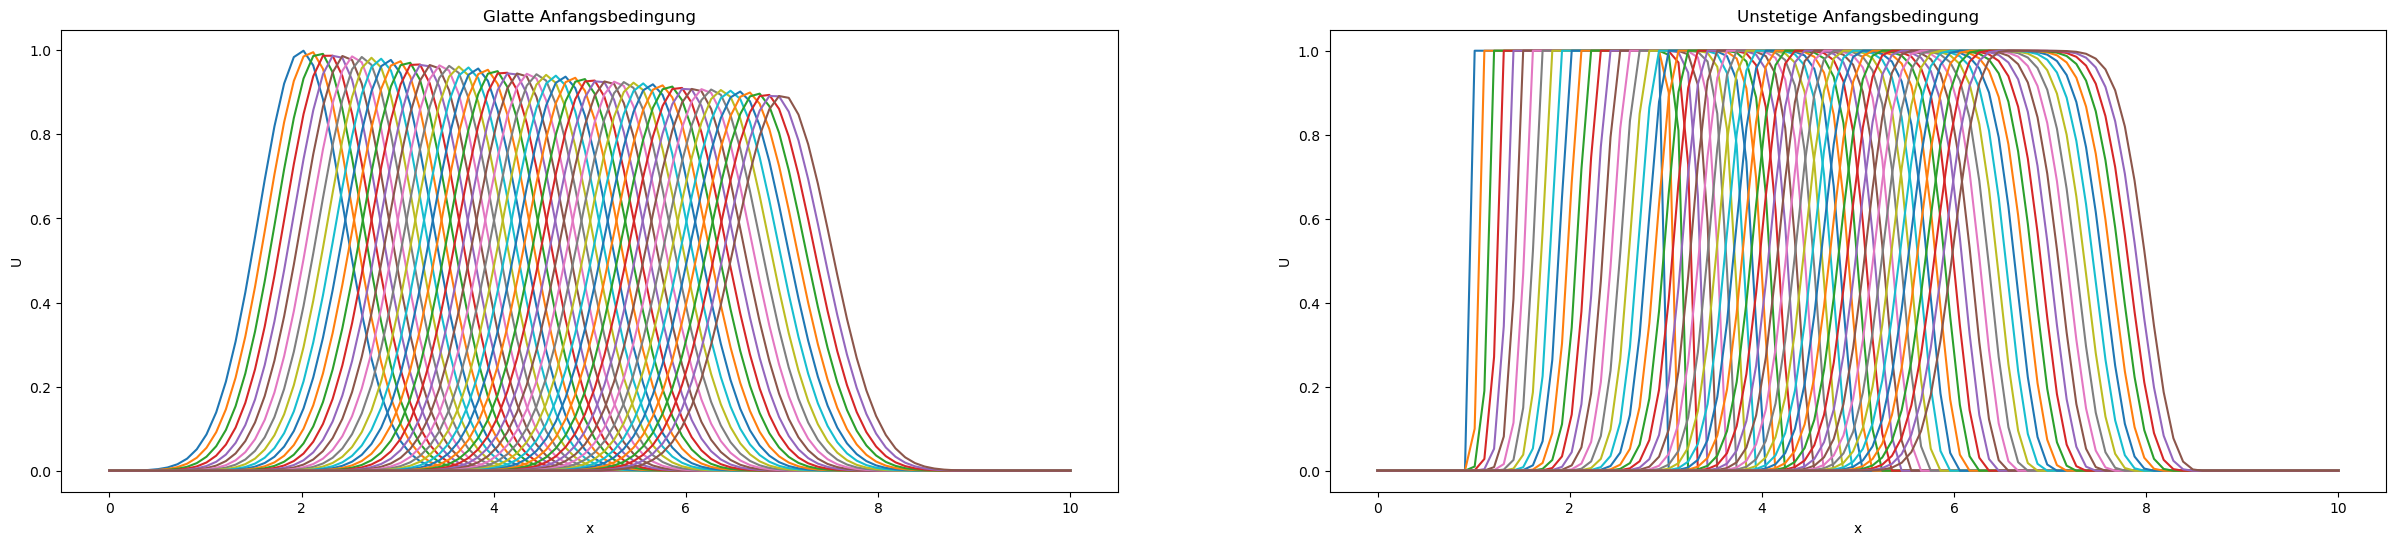

In [13]:
# Plot der Lösung    

f1 = plt.figure(figsize=(30, 6))

ax1 = plt.subplot(121)
for n in range(U_glatt.shape[0]):
    plt.plot(x, U_glatt[n], label='t='+str(n*dt1))
plt.title('Glatte Anfangsbedingung')
plt.xlabel('x')
plt.ylabel('U')

ax2 = plt.subplot(122)
for n in range(U_unstetig.shape[0]):
    plt.plot(x, U_unstetig[n], label='t='+str(n*dt2))
plt.title('Unstetige Anfangsbedingung')
plt.xlabel('x')
plt.ylabel('U')

plt.show()